In [1]:
from numpy import *
import numpy as np
import operator

In [2]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0] # 特征向量的数量，4
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet # tile方法可以将矩阵以指定的方式扩展，这里用来快速计算差值
    sqDiffMat = diffMat ** 2 # 计算差值的平方
    sqDistances = sqDiffMat.sum(axis=1) # 平方和的计算
    distances = sqDistances ** 0.5 # 开平方，得到距离
    sortedDistIndicied = distances.argsort()# 按数值的升序排列返回下标
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicied[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1 # 字典的get方法，如果有这个key，则选择它的值，否则选择0，然后+1
    sortedClassCount = sorted(classCount.items(), # 给字典排序
                              key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [20]:
def fileToNumpy(filename): # 将文件转化成Numpy矩阵
    file = open(filename)
    file_lines = file.readlines()
    numberOfLines = len(file_lines)
    dataArray = np.zeros((numberOfLines, 3))
    labels = []
    index = 0
    for line in file_lines:
        line = line.strip() # 参数为空时，默认删除开头、结尾处空白符（包括'\n', '\r',  '\t',  ' ')
        formLine = line.split('\t')
        dataArray[index,:] = formLine[0:3]
        labels.append((formLine[-1]))
        index += 1
    label_id = []
    dic = {}
    index = 1
    for i in range(len(labels)):
        x = dic.get(labels[i], -1)
        label_id.append(x)
        if (label_id[i] == -1):
            label_id[i] = index
            dic[labels[i]] = index
            index += 1
    return dataArray, label_id

In [21]:
test_file = "datingTestSet.txt"
test_data, test_labels = fileToNumpy(test_file)

In [22]:
test_data

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [23]:
test_labels[0:20]

[1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1]

In [24]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

由下面三张图对数据的二维分析得，属于哪个类别主要和第0，1维数据有关，而与第三维数据相关不大。

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'> <class 'matplotlib.axes._subplots.AxesSubplot'>


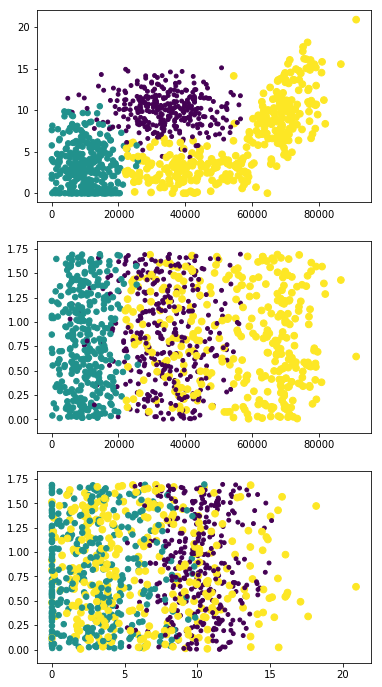

In [150]:
fig, ax = plt.subplots(3)
print(type(fig), type(ax), type(ax[0]))
ax[0].scatter(test_data[:,0], test_data[:,1], s=15.0*np.array(test_labels), c=15.0*np.array(test_labels))
ax[1].scatter(test_data[:,0], test_data[:,2], 15.0*np.array(test_labels), 15.0*np.array(test_labels)) # 分别是大小和颜色，只写一个是大小size
ax[2].scatter(test_data[:,1], test_data[:,2], 15.0*np.array(test_labels), 15.0*np.array(test_labels))
# ax[0].legend(handles=[0, 1, 3], labels=['1', '2', '3'])
# 如何控制图像的比例以及大小呢？
fig.set_size_inches(6, 12)

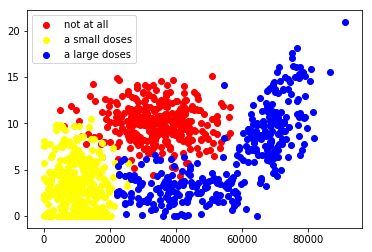

In [156]:
def scatterLegend(data, labels, x, y):
    type1 = []
    type2 = []
    type3 = []
    for i in range(len(labels)):
        if labels[i] == 1:
            type1.append(np.array(data[i]))
        elif labels[i] == 2:
            type2.append(np.array(data[i]))
        else:
            type3.append(np.array(data[i]))
    type1 = np.array(type1)
    type2 = np.array(type2)
    type3 = np.array(type3)
    g1 = plt.scatter(type1[:, x], type1[:, y], c='red')
    g2 = plt.scatter(type2[:, x], type2[:, y], c='yellow')
    g3 = plt.scatter(type3[:, x], type3[:, y], c='blue')
    plt.legend(handles=[g1, g2, g3], labels=['not at all', 'a small doses', 'a large doses'])
scatterLegend(test_data, test_labels, 0, 1)

进行归一化处理

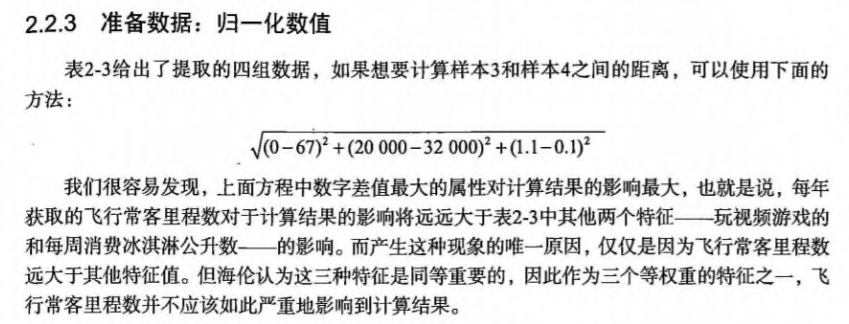

In [97]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet /= tile(ranges, (m, 1))
    return normDataSet, ranges, minVals
dataSet, ranges, minVlas = autoNorm(test_data)

In [98]:
test_data.min(0) # 无参数是所有最小值；0指axis=0，列最小值；1指axis=1，行最小值。

array([0.      , 0.      , 0.001156])

In [112]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = fileToNumpy('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],\
                                    datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d"\
             % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
        print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
datingClassTest()

the classifier came back with: 1, the real answer is: 1
the total error rate is: 0.000000
the classifier came back with: 2, the real answer is: 2
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classifier came back with: 1, the real answer is: 1
the total error rate is: 0.000000
the classifier came back with: 1, the real answer is: 1
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classifier came back with: 1, the real answer is: 1
the total error rate is: 0.000000
the classifier came back with: 3, the real answer is: 3
the total error rate is: 0.000000
the classi

错误率可以降低到5%左右，结果已经是不错的了。

In [151]:
def classifyPerson():
    results = ['not at all', 'in small doses', 'in large doses']
    dataSet, labels = fileToNumpy('datingTestSet.txt')
    dataSet, ranges, minVals = autoNorm(dataSet)
    miles = float(input('请输入一年的飞行里程数：'))
    per = float(input('请输入花在电子游戏上的时间比例：'))
    ice = float(input('请输入奶油冰淇淋的消费数：'))
    testSet = np.array([miles, per, ice])
    #print(dataSet[0:20,:])
    #print(labels[:20])
    #print(testSet)
    testSet = (testSet - minVals)/ranges
    #print(testSet)
    ans = classify0(testSet, dataSet, labels, 3)
    #print(ans)
    print("You probably like this person: %s"%results[ans-1])
classifyPerson()

请输入一年的飞行里程数：6487	
请输入花在电子游戏上的时间比例：3.540265	
请输入奶油冰淇淋的消费数：0.822483	
You probably like this person: in small doses
